In [3]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


In [0]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import pandas as pd

In [0]:
data = np.load('/content/drive/My Drive/Residency_10/Project1/images.npy', allow_pickle= True)

In [5]:
len(data)

409

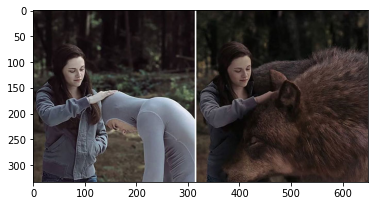

In [7]:
plt.imshow(data[0][0])

In [8]:
data[0][1]

[{'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}]},
 {'imageHeight': 333,
  'imageWidth': 650,
  'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}]}]

In [0]:
#tst = cv2.imread('image_0.jpg')
#plt.imshow(tst)

In [0]:
X = []
img_height = 128
img_width = 128
for i in range(0,len(data)):
  img = data[i][0]
  cv2.imwrite('image_'+str(i)+'.jpg',img)
  image_name = 'image_'+str(i)+'.jpg'
  metadata = data[i][1]

  for a in metadata:
      Original_width = (a['imageWidth'])
      Original_height = (a['imageHeight'])
      x1_ratio = a['points'][0]['x']
      y1_ratio = a['points'][0]['y']
      x2_ratio = a['points'][1]['x']
      y2_ratio = a['points'][1]['y']
      x1_original = int(x1_ratio*Original_width)
      x2_original = int(x2_ratio*Original_width)
      y1_original = int(y1_ratio*Original_height)
      y2_original = int(y2_ratio*Original_height)
      x1_resized = int(x1_ratio*img_width)
      x2_resized = int(x2_ratio*img_width)
      y1_resized = int(y1_ratio*img_height)
      y2_resized = int(y2_ratio*img_height)
      label = a['label'][0]
      X.append([image_name,
               Original_width,Original_height,
               x1_ratio,y1_ratio,x2_ratio,y2_ratio,
               x1_original,x2_original,y1_original,y2_original,
               x1_resized,x2_resized,y1_resized,y2_resized,
               label])

In [43]:
df=pd.DataFrame(X,columns=['filename','ori_width','Ori_height','x1_ratio','y1_ratio','x2_ratio','y2_ratio','x1_ori','x2_ori','y1_ori','y2_ori','x_min','x_max','y_min','y_max','class'])

df.head()

,filename,ori_width,Ori_height,x1_ratio,y1_ratio,x2_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,x_max,y_min,y_max,class
0,image_0.jpg,650,333,0.086154,0.306306,0.172308,0.453453,56,112,102,151,11,22,39,58,Face
1,image_0.jpg,650,333,0.583077,0.291291,0.658462,0.468468,379,428,97,156,74,84,37,59,Face
2,image_1.jpg,1280,697,0.705309,0.232604,0.769231,0.361829,902,984,162,252,90,98,29,46,Face
3,image_2.jpg,460,240,0.469565,0.050000,0.606522,0.333333,216,279,12,80,60,77,6,42,Face
4,image_2.jpg,460,240,0.628261,0.008333,0.745652,0.308333,289,343,2,74,80,95,1,39,Face


In [44]:
df.tail()

,filename,ori_width,Ori_height,x1_ratio,y1_ratio,x2_ratio,y2_ratio,x1_ori,x2_ori,y1_ori,y2_ori,x_min,x_max,y_min,y_max,class
1127,image_408.jpg,656,493,0.250000,0.247465,0.285061,0.304260,164,186,122,150,32,36,31,38,Face
1128,image_408.jpg,656,493,0.484756,0.233266,0.527439,0.322515,318,346,115,159,62,67,29,41,Face
1129,image_408.jpg,656,493,0.592988,0.316430,0.620427,0.359026,389,407,156,177,75,79,40,45,Face
1130,image_408.jpg,656,493,0.772866,0.413793,0.801829,0.458418,507,526,204,226,98,102,52,58,Face
1131,image_408.jpg,656,493,0.803354,0.515213,0.850610,0.626775,527,558,253,309,102,108,65,80,Face


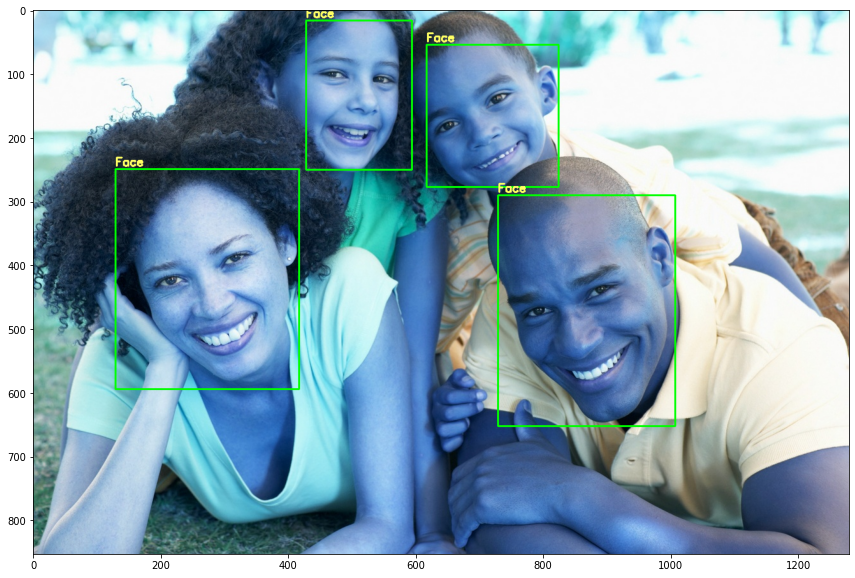

In [52]:
#Pickup a random image number
img_num = np.random.randint(0, df.shape[0])
#img_num=5

#Read the image
img_file = df.loc[img_num,'filename']
#print(img_file)
#img_loc=int(df.loc[img_num,'filename'].split('_')[1])-1
#img = img_array[img_loc][0]
img = cv2.imread(img_file)

#Find all rows which have same file name
rows_with_file = df[df['filename'] == img_file].index.tolist()

#Draw rectangle(s) as per bounding box information
for i in rows_with_file:

    #Get bounding box
    xmin, ymin, xmax, ymax = df.loc[i, ['x1_ori', 'y1_ori', 'x2_ori', 'y2_ori']]
    #Get Label
    label = df.loc[i, 'class']
    #Add bounding box
    cv2.rectangle(img, (xmin,ymin), (xmax, ymax), (0,255,0), 2)
    #Add text
    cv2.putText(img,label,(xmin, ymin-5),cv2.FONT_HERSHEY_SIMPLEX, 0.6, (100, 255, 255), 2)

#Convert BGR format (used by opencv to RGB format used by matplotlib)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

#Draw image using matplotlib
plt.figure(figsize=(15,10))
plt.imshow(img)
plt.show()

In [53]:
df.columns

Index(['filename', 'ori_width', 'Ori_height', 'x1_ratio', 'y1_ratio',
       'x2_ratio', 'y2_ratio', 'x1_ori', 'x2_ori', 'y1_ori', 'y2_ori', 'x_min',
       'x_max', 'y_min', 'y_max', 'class'],
      dtype='object')

In [0]:
from keras.applications.mobilenet import preprocess_input
IMAGE_HEIGHT=128
IMAGE_WIDTH=128

masks=np.zeros((int(df.shape[0]), 4))
X_train=np.zeros((int(df.shape[0]),IMAGE_HEIGHT,IMAGE_WIDTH,3))
for index in range(df.shape[0]):
  img=cv2.imread(df.filename[index])
  img=cv2.resize(img, dsize=(IMAGE_HEIGHT,IMAGE_WIDTH),interpolation=cv2.INTER_CUBIC)
  try:
    img=img[:,:,:3]
  except:
    continue
  X_train[index]=preprocess_input(np.array(img,dtype=np.float32))
  masks[index,0] = x1_original * IMAGE_WIDTH / Original_width
  masks[index,1] = y1_original * IMAGE_HEIGHT / Original_height
  masks[index,2] = x2_original * IMAGE_WIDTH / Original_width
  masks[index,3] = y2_original * IMAGE_HEIGHT / Original_height

In [87]:
print(X_train.shape, masks.shape)

(1132, 128, 128, 3) (1132, 4)


In [0]:
from PIL import Image
from keras_applications import mobilenet
from keras.applications.mobilenet import preprocess_input
from keras.backend import epsilon
from keras.models import Model
from keras.layers import Conv2D
from keras.layers import Reshape

In [0]:
def loss(gt,pred):
    intersections = 0
    unions = 0
    diff_width = np.minimum(gt[:,0] + gt[:,2], pred[:,0] + pred[:,2]) - np.maximum(gt[:,0], pred[:,0])
    diff_height = np.minimum(gt[:,1] + gt[:,3], pred[:,1] + pred[:,3]) - np.maximum(gt[:,1], pred[:,1])
    intersection = diff_width * diff_height
    
    # Compute union
    area_gt = gt[:,2] * gt[:,3]
    area_pred = pred[:,2] * pred[:,3]
    union = area_gt + area_pred - intersection

#     Compute intersection and union over multiple boxes
    for j, _ in enumerate(union):
        if union[j] > 0 and intersection[j] > 0 and union[j] >= intersection[j]:
            intersections += intersection[j]
            unions += union[j]

    # Compute IOU. Use epsilon to prevent division by zero
    iou = np.round(intersections / (unions + epsilon()), 4)
    iou = iou.astype(np.float32)
    return iou

def IoU(y_true, y_pred):
    iou = tf.py_func(loss, [y_true, y_pred], tf.float32)
    return iou

In [0]:
from keras.applications.mobilenet import MobileNet
IMAGE_SIZE=128
IMG_SHAPE=(IMAGE_SIZE, IMAGE_SIZE, 3)
base_model = MobileNet(input_shape=IMG_SHAPE,include_top=False,alpha=1.0)

In [0]:
base_model.trainable = True

# Fine-tune from this layer onwards
fine_tune_at = len(base_model.layers)-10

# Freeze all the layers before the `fine_tune_at` layer
for layer in base_model.layers[:fine_tune_at]:
  layer.trainable =  False

In [98]:
base_model.summary()

Model: "mobilenet_1.00_128"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 128, 128, 3)       0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 129, 129, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 64, 64, 32)        864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 64, 64, 32)        128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 64, 64, 32)        288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 64, 64, 32) 

In [0]:
import tensorflow as tf
from keras.optimizers import Adam

In [100]:
X=base_model.layers[fine_tune_at].output
X=Conv2D(4,kernel_size=4)(X)
X=Reshape((4,))(X)
base_model=Model(inputs=base_model.input, output=X)
base_model.compile(optimizer='adam',loss='mse',metrics=[IoU])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("re...)`
  after removing the cwd from sys.path.


In [101]:
base_model.fit(X_train,masks,epochs=10,batch_size=32,verbose=1)

Epoch 1/10
1132/1132 [==============================] - 35s 31ms/step - loss: 1111.9223 - IoU: 0.3978
Epoch 2/10
1132/1132 [==============================] - 31s 27ms/step - loss: 23.6261 - IoU: 0.8162
Epoch 3/10
1132/1132 [==============================] - 31s 27ms/step - loss: 3.7529 - IoU: 0.9205
Epoch 4/10
1132/1132 [==============================] - 31s 28ms/step - loss: 2.1853 - IoU: 0.9385
Epoch 5/10
1132/1132 [==============================] - 32s 28ms/step - loss: 1.5404 - IoU: 0.9474
Epoch 6/10
1132/1132 [==============================] - 31s 28ms/step - loss: 1.1921 - IoU: 0.9530
Epoch 7/10
1132/1132 [==============================] - 31s 28ms/step - loss: 1.0298 - IoU: 0.9560
Epoch 8/10
1132/1132 [==============================] - 32s 29ms/step - loss: 0.8438 - IoU: 0.9606
Epoch 9/10
1132/1132 [==============================] - 33s 29ms/step - loss: 0.7941 - IoU: 0.9615
Epoch 10/10
1132/1132 [==============================] - 32s 29ms/step - loss: 0.7023 - IoU: 0.9642
